In [3]:
#Libraries and data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
config = {"font.family":'Times New Roman', "font.size": 10}
rcParams.update(config)

<ipython-input-4-81820cb951ef>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X, Y, z, cmap=my_colormap)


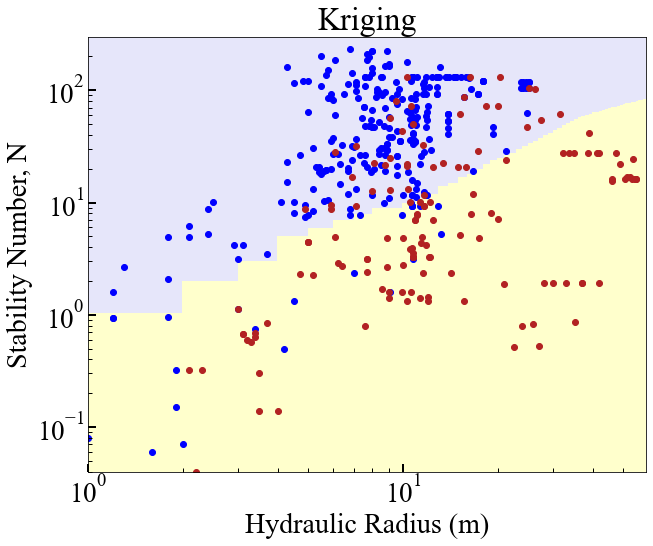

In [4]:
#Kriging

df = pd.read_csv('Extended Mathews for GP and Kriging.csv')
data = df.values.tolist()
data = np.array(data)
gridx = np.arange(1, 60,1)
gridy = np.arange(0.04, 300,1)

def calc(data, gridx, gridy):
    OK = OrdinaryKriging(data[:, 0],data[:, 1],data[:, 2],
         variogram_model="linear",verbose=False,enable_plotting=False,)
    z, ss = OK.execute("grid", gridx, gridy)
    return z

from matplotlib.colors import ListedColormap
my_colormap = ListedColormap(['#E6E6FA','#FFFFCC'])
plt.figure(figsize=(10,8))
z = calc(data, gridx, gridy)
X, Y = np.meshgrid(gridx, gridy)
plt.pcolor(X, Y, z, cmap=my_colormap)
plt.tick_params(direction='in',which='major',width=2,length=8)
plt.tick_params(direction='in',which='minor',width=1,length=4)
class_0 = df[df['Stability'] == 0]
class_1 = df[df['Stability'] == 1]
plt.scatter(class_0['HR'], class_0['N'], color="#0000FF", label='Class 0')
plt.scatter(class_1['HR'], class_1['N'], color="#B22222", label='Class 1')
plt.xticks(np.logspace(0,2,3,base=10),size=27)
plt.xscale('log')
plt.yticks(np.logspace(0,3,4,base=10),size=27)
plt.yscale('log')
plt.xlabel('Hydraulic Radius (m)',size=28)
plt.ylabel('Stability Number, N',size=28)
plt.title('Kriging',size=32)
plt.savefig('D:/DATA/Extended Graph/Python/Decision boundary/Kriging2.svg', format='svg')
plt.show() 
